In [1]:
from getunprocesseddates import *
from getmatchedradec import *
from manualdifferencing import *
import numpy
import matplotlib.pyplot as plt
from desispec.spectra import Spectra
from astropy.table import Table

In [2]:
night_arr = getUnprocessedDates()
print(night_arr)

len(night_arr): 20
--- get unprocessed dates took:  8.415595769882202 seconds ---
[20210606 20210607 20210614 20210615 20210616 20210617 20210618 20210619
 20210620 20210621 20210626 20210627 20210628 20210629 20210704 20210705
 20210706 20210707 20210708 20210709]


yyyymmdd = 20210606
--- read in file:  38.98289370536804 seconds ---
INFO:spectra.py:253:read_spectra: iotime 1.416 sec to read spectra-3-1882-thru20210606.fits at 2021-07-27T14:25:36.118171
s0r selected 20210602


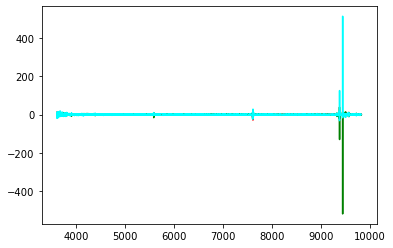

--- manual differencing took:  2.4279327392578125 seconds ---
yyyymmdd = 20210607
--- read in file:  9.92796802520752 seconds ---
INFO:spectra.py:253:read_spectra: iotime 0.910 sec to read spectra-3-21163-thru20210607.fits at 2021-07-27T14:25:48.063942
no reference nights
--- manual differencing took:  1.3553752899169922 seconds ---
yyyymmdd = 20210614
--- read in file:  11.313439130783081 seconds ---
INFO:spectra.py:253:read_spectra: iotime 1.400 sec to read spectra-3-1816-thru20210614.fits at 2021-07-27T14:26:01.289211
s0r selected 20210613


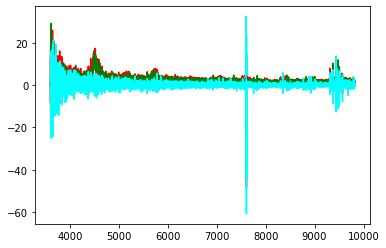

--- manual differencing took:  2.405372142791748 seconds ---
yyyymmdd = 20210615
--- read in file:  20.776763677597046 seconds ---
INFO:spectra.py:253:read_spectra: iotime 2.553 sec to read spectra-3-80978-thru20210615.fits at 2021-07-27T14:26:25.750077
s0r selected 20210601


RuntimeError: no valid nights were selected!

In [3]:
for a in night_arr: #first loop
    yyyymmdd = a
    print('yyyymmdd = ' +str(yyyymmdd))
    dats_group = readInFile(yyyymmdd)
    diff_spec = Spectra()
    print(diff_spec)
    diff_spec = manualDifferencing(dats_group, yyyymmdd)

In [ ]:
#get array of yyyymmdds to loop through
#getUnprocessedDates.py

In [4]:
f = open('/global/cscratch1/sd/clepart/desi_pg.txt')
file = f.read()
db_name, db_user, db_pwd, db_host = file.split()
conn = psycopg2.connect(dbname=db_name, user=db_user, password=db_pwd, host=db_host)
    
# Open a cursor to perform database operations
cur = conn.cursor()
cur.execute("""SELECT DISTINCT yyyymmdd from fibermap_daily WHERE yyyymmdd > 20210604""") #most recent, remove in future
desi_arr = cur.fetchall()

cur.close()
conn.close()

In [5]:
#for i in range(len(desi_arr)):
#    print(desi_arr[i])
print(len(desi_arr))
print(type(desi_arr))

27
<class 'list'>


In [6]:
filename_conn = "/global/cfs/cdirs/desi/science/td/daily-search/transients_search.db"
conn = sqlite3.connect(filename_conn)

trans_arr = conn.execute("""SELECT DISTINCT yyyymmdd from unprocessed_exposures""").fetchall()

conn.close()

In [7]:
#for i in range(len(trans_arr)):
#    print(trans_arr[i])
print(len(trans_arr))

7


In [8]:
night_arr = numpy.setdiff1d(desi_arr, trans_arr)

In [9]:
for i in range(10):
    print(night_arr[i])
print('len(night_arr): ' + str(len(night_arr)))

20210606
20210607
20210614
20210615
20210616
20210617
20210618
20210619
20210620
20210621
len(night_arr): 20


In [3]:
#for a in query_arr:
start_time = time.time()
#get time duration stamp on process that reads in all spectra files for one night
for a in night_arr: #first loop
    yyyymmd = a
#read in and store in one place all the fibermap information in the spectra files
dats=[]
for filename in glob.glob(f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/*/{yyyymmdd}/spectra-*.fits"):
    t = Table.read(filename, format='fits',hdu=1, memmap=True)[['TARGETID','TARGET_RA','TARGET_DEC','TILEID','OBJTYPE','PETAL_LOC','NIGHT','MJD']]
    t=t[t['OBJTYPE']=='TGT']
    dats.append(t)
dats=vstack(dats, join_type='inner',metadata_conflicts='silent')
# group all the observations by TARGET_RA and TARGET_DEC
# note that this is more reliable than grouping by TARGETID as TARGETID is NOT a unique identifier of RA and DEC
dats_group = dats.group_by(['TARGET_RA','TARGET_DEC'])
print("--- read in file:  %s seconds ---" % (time.time() - start_time))
#get RA_DEC, NIGHT for multiple pairs of tile/petal

--- read in file:  76.25680613517761 seconds ---


In [10]:
print(len(dats_group)) #ungrouped
for i in range(5):
    print(dats_group[i])
print(len(dats_group.groups)) #grouped 
for g in range(5):
    print(dats_group.groups[g])

284964
     TARGETID         TARGET_RA         TARGET_DEC    TILEID OBJTYPE PETAL_LOC  NIGHT        MJD      
----------------- ------------------ ---------------- ------ ------- --------- -------- --------------
39627841574276999 148.43269333549472 2.29989340162531      1     TGT         3 20210406 59311.13373059
     TARGETID         TARGET_RA         TARGET_DEC    TILEID OBJTYPE PETAL_LOC  NIGHT        MJD      
----------------- ------------------ ---------------- ------ ------- --------- -------- --------------
39627841574276999 148.43269333549472 2.29989340162531      1     TGT         3 20210406 59311.14474809
     TARGETID         TARGET_RA         TARGET_DEC    TILEID OBJTYPE PETAL_LOC  NIGHT        MJD      
----------------- ------------------ ---------------- ------ ------- --------- -------- --------------
39627841574276999 148.43269333549472 2.29989340162531      1     TGT         3 20210406 59311.15405799
     TARGETID         TARGET_RA         TARGET_DEC     TILEID OBJT

In [4]:

groups01 = dats_group.groups[0:2]
groups01 = groups01.group_by(['TARGET_RA','TARGET_DEC'])

#for g in groups01.groups:
for g in dats_group.groups:
    #print(type(g)) <class 'astropy.table.table.Table'>
    start_time = time.time()
    d = g.group_by(['NIGHT'])
    du = unique(d, keys=['NIGHT']) 
    print("du[0]" + str(du[0]))
    s0 = Spectra() #spectra_no_expid() ### all spectra
    s0c = Spectra() #spectra_no_expid() ### only current spectra
    s0r = Spectra() #spectra_no_expid() ### only reference spectra
    s0d = Spectra() #differenced spectra

    f0 = f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/{du[0]['TILEID']}/{yyyymmdd}/spectra-{du[0]['PETAL_LOC']}-{du[0]['TILEID']}-thru{yyyymmdd}.fits"
    #this is being done multiple times: need to find way to implement select(targets = ['TID']) for files already read in
    s0 = read_spectra(f0)
    s0c = s0.select(nights = [yyyymmdd])
    #coadd(s0c)
    for t in du:
        
        if (t['NIGHT'] == (yyyymmdd-1)):
            s0c.update(s0.select(nights = [yyyymmdd-1]))
            print("updated %s" % s0.select(nights = [yyyymmdd-1]))
            coadd(s0c)
        elif t['NIGHT'] < yyyymmdd-1: # in future, use getPrevObsdate for days > 30 days ago
            if (s0r.num_spectra() == 0): 
            # first (or only) ref night found
                s0r = s0.select([t['NIGHT']])
                print(t['NIGHT'])
            else:
                s0r = s0.update(s0.select(nights = [t['NIGHT']]))
                print(t['NIGHT'])
            coadd(s0r)
            for i in s0r.flux:
            #flip signs of r0a.flux
                s0r.flux[i] = -1*r0a.flux[i]
    
    if s0r.num_spectra() != 0:
    # if there is something to difference
        s0d.update(s0c) #not working, produce NoneType
        s0d.update(s0r) #not working, produces NoneType
        print("s0d differenced")
        coadd(s0d)   #how to store differenced spectra as one per reference spectra will be produced
    else:
        print("no reference nights")
    print("--- group_by NIGHT  %s seconds ---" % (time.time() - start_time))
                


du[0]     TARGETID         TARGET_RA         TARGET_DEC    TILEID OBJTYPE PETAL_LOC  NIGHT        MJD      
----------------- ------------------ ---------------- ------ ------- --------- -------- --------------
39627841574276999 148.43269333549472 2.29989340162531      1     TGT         3 20210406 59311.13373059
INFO:spectra.py:253:read_spectra: iotime 2.227 sec to read spectra-3-1-thru20210406.fits at 2021-07-22T09:39:05.824304
no reference nights
--- group_by NIGHT  6.062382698059082 seconds ---
du[0]     TARGETID         TARGET_RA         TARGET_DEC     TILEID OBJTYPE PETAL_LOC  NIGHT        MJD      
----------------- ----------------- ------------------ ------ ------- --------- -------- --------------
39627841574277409 148.4503883832226 2.2991424581727253     12     TGT         3 20210405 59310.11613136
INFO:spectra.py:253:read_spectra: iotime 1.499 sec to read spectra-3-12-thru20210406.fits at 2021-07-22T09:39:11.238860


KeyboardInterrupt: 

In [127]:
###********* manual differencing
###**********************************


yyyymmdd = 20210406
dats=[]
for filename in glob.glob(f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/80892/20210406/spectra-3-80892-thru20210406.fits"):
    t = Table.read(filename, format='fits',hdu=1, memmap=True)[['TARGETID','TARGET_RA','TARGET_DEC','TILEID','OBJTYPE','PETAL_LOC','NIGHT','MJD']]
    t=t[t['OBJTYPE']=='TGT']
    dats.append(t)
dats=vstack(dats, join_type='inner',metadata_conflicts='silent')
# group all the observations by TARGET_RA and TARGET_DEC
# note that this is more reliable than grouping by TARGETID as TARGETID is NOT a unique identifier of RA and DEC
dats_group = dats.group_by(['TARGET_RA','TARGET_DEC'])

d = dats_group.group_by(['NIGHT'])
du = unique(d, keys=['NIGHT'])

s0 = Spectra() #spectra_no_expid() ### all spectra
s0c = Spectra() #spectra_no_expid() ### only current spectra
s0r = Spectra() #spectra_no_expid() ### only reference spectra
s0d = Spectra() #differenced spectra

f0 = f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/80892/20210406/spectra-3-80892-thru20210406.fits"
#this is being done multiple times: need to find way to implement select(targets = ['TID']) for files already read in
s0 = read_spectra(f0)
s0c = s0.select(nights = [yyyymmdd], targets = [39632930984689832])
for t in du:
    if t['NIGHT'] < yyyymmdd: # in future, use getPrevObsdate for days > 30 days ago
        if (s0r.num_spectra() == 0): 
        # first (or only) ref night found
            s0r = s0.select(nights = [t['NIGHT']], targets= [39632930984689832])
            print(t['NIGHT'])
        else:
            s0r.update(s0.select(nights = [t['NIGHT']], targets= [39632930984689832]))
            print(t['NIGHT'])

if s0r.num_spectra() != 0:
# i.e. there is something to difference
    s0d.update(s0c)
    coadd(s0r)
    for i in s0d.flux:
        for j in range(len(s0d.flux[i])):
            s0d.flux[i][j] = s0c.flux[i][j] - s0r.flux[i][j]
    for i in s0d.ivar:
        ok = numpy.logical_and(s0c.ivar[i][0,:] != 0, s0r.ivar[i][0,:] != 0)
        s0d.ivar[i][0,ok] = (1/(1/s0c.ivar[i][0,ok] + 1/s0r.ivar[i][0,ok]))
    coadd(s0d)
else:
    print("no reference nights")           
    


#print("--- group_by NIGHT  %s seconds ---" % (time.time() - start_time))


INFO:spectra.py:253:read_spectra: iotime 2.430 sec to read spectra-3-80892-thru20210406.fits at 2021-07-26T16:29:33.693238
20210318
20210319
20210404
ok: 
{'b': array([[0.01202291, 0.01652905, 0.01661521, ..., 1.36920261, 1.39959073,
        1.53979647]]), 'r': array([[1.35574245, 1.25804484, 1.3272047 , ..., 0.05000559, 0.08597526,
        0.13494942]]), 'z': array([[ 8.99221802,  7.23160028,  7.011415  , ..., 10.92893696,
        11.88213634, 13.70275688]])}
done: 
{'b': array([[0.01068336, 0.01397592, 0.01396004, ..., 0.97345609, 0.99354801,
        1.07233834]]), 'r': array([[1.35574245, 1.25804484, 1.3272047 , ..., 0.05000559, 0.08597526,
        0.13494942]]), 'z': array([[ 8.99221802,  7.23160028,  7.011415  , ..., 10.92893696,
        11.88213634, 13.70275688]])}
ok: 
{'b': array([[0.01202291, 0.01652905, 0.01661521, ..., 1.36920261, 1.39959073,
        1.53979647]]), 'r': array([[1.35574245, 1.25804484, 1.3272047 , ..., 0.05000559, 0.08597526,
        0.13494942]]), 'z': array

In [4]:
yyyymmdd = 20210406
dats=[]
for filename in glob.glob(f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/80892/20210406/spectra-3-80892-thru20210406.fits"):
    t = Table.read(filename, format='fits',hdu=1, memmap=True)[['TARGETID','TARGET_RA','TARGET_DEC','TILEID','OBJTYPE','PETAL_LOC','NIGHT','MJD']]
    t=t[t['OBJTYPE']=='TGT']
    dats.append(t)
dats=vstack(dats, join_type='inner',metadata_conflicts='silent')
# group all the observations by TARGET_RA and TARGET_DEC
# note that this is more reliable than grouping by TARGETID as TARGETID is NOT a unique identifier of RA and DEC
dats_group = dats.group_by(['TARGET_RA','TARGET_DEC'])

d = dats_group.group_by(['NIGHT'])
du = unique(d, keys=['NIGHT'])


d = dats_group.group_by(['NIGHT'])
du = unique(d, keys=['NIGHT'])
print(du[0])


     TARGETID         TARGET_RA         TARGET_DEC    TILEID OBJTYPE PETAL_LOC  NIGHT        MJD      
----------------- ----------------- ----------------- ------ ------- --------- -------- --------------
39632930984689832 213.1181626866923 32.45274473655966  80892     TGT         3 20210318 59292.40819121


In [ ]:
s0 = Spectra() #spectra_no_expid() ### all spectra
s0c = Spectra() #spectra_no_expid() ### only current spectra
s0r = Spectra() #spectra_no_expid() ### only reference spectra
s0d = Spectra() #differenced spectra

f0 = f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/{du[0]['TILEID']}/{yyyymmdd}/spectra-{du[0]['PETAL_LOC']}-{du[0]['TILEID']}-thru{yyyymmdd}.fits"
#this is being done multiple times: need to find way to implement select(targets = ['TID']) for files already read in
s0 = read_spectra(f0)
s0c = s0.select(nights = [yyyymmdd], targets = [du[0]['TARGETID']])
for t in du:
    if t['NIGHT'] < yyyymmdd: # in future, use getPrevObsdate for days > 30 days ago
        if (s0r.num_spectra() == 0): 
        # first (or only) ref night found
            s0r = s0.select(nights = [t['NIGHT']], targets= [du[0]['TARGETID']])
            print(t['NIGHT'])
        else:
            s0r.update(s0.select(nights = [t['NIGHT']], targets= [du[0]['TARGETID']]))
            print(t['NIGHT'])

if s0r.num_spectra() != 0:
# i.e. there is something to difference
    s0d.update(s0c)
    coadd(s0r)
    for i in s0d.flux:
        for j in range(len(s0d.flux[i])):
            s0d.flux[i][j] = s0c.flux[i][j] - s0r.flux[i][j]
    for i in s0d.ivar:
        ok = numpy.logical_and(s0c.ivar[i][0,:] != 0, s0r.ivar[i][0,:] != 0)
        s0d.ivar[i][0,ok] = (1/(1/s0c.ivar[i][0,ok] + 1/s0r.ivar[i][0,ok]))
    coadd(s0d)
else:
    print("no reference nights")

In [111]:
for i in s0r.ivar:
    print(s0r.ivar[i])
    for j in s0r.ivar[i]:
        print(len(j))

[[0.09588648 0.09048054 0.08735737 ... 3.36796045 3.42466566 3.53225809]]
2751
[[4.13261616 4.05517855 3.96227258 ... 0.11980391 0.1878369  0.29207987]]
2326
[[27.4641335  22.46793175 21.77426529 ... 24.82943022 28.15847147
  30.65962052]]
2881


In [14]:
"""
import pandas as pd 
pd.DataFrame(s0d.flux['b']).to_csv('s0d_m_flux.csv')
pd.DataFrame(s0c.flux['b']).to_csv('s0c_flux.csv')
pd.DataFrame(s0r.flux['b']).to_csv('s0r_m_flux.csv')
"""

In [66]:
print(type(s0d.ivar['b'][0]))

<class 'numpy.float64'>


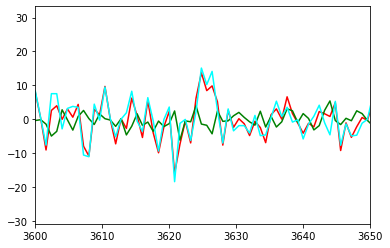

In [128]:
for b in s0d.bands:
#         ok = numpy.logical_and(s1.mask[b][w[0]] == 0,s1.ivar[b][w[0]] != 0)
#         plt.plot(s1.wave[b][ok],s1.flux[b][w[0],ok]) 
    ok = numpy.logical_and(s0d.mask[b][0,:] == 0, s0d.ivar[b][0] != 0)
    plt.plot(s0c.wave[b][ok],s0c.flux[b][0,ok], color = 'red')
    plt.plot(s0r.wave[b][ok],s0r.flux[b][0,ok], color = 'green')
    plt.plot(s0d.wave[b][ok],s0d.flux[b][0,ok], color = 'cyan')
    #plt.ylim(10,12)
    #print(plt.xlim)
plt.xlim(3600, 3650)
plt.show()

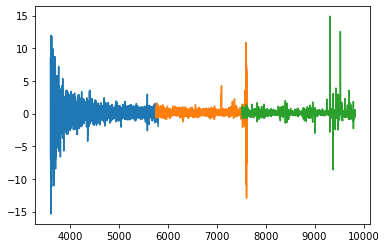

In [105]:
for b in s0c.bands:
#         ok = numpy.logical_and(s1.mask[b][w[0]] == 0,s1.ivar[b][w[0]] != 0)
#         plt.plot(s1.wave[b][ok],s1.flux[b][w[0],ok]) 
    ok = numpy.logical_and(s0c.mask[b][0,:] == 0,s0c.ivar[b][0,:] != 0)
    plt.plot(s0c.wave[b][ok],s0c.flux[b][0,ok])

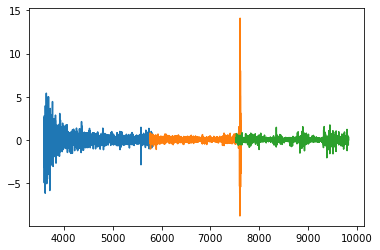

In [106]:
for b in s0r.bands:
#         ok = numpy.logical_and(s1.mask[b][w[0]] == 0,s1.ivar[b][w[0]] != 0)
#         plt.plot(s1.wave[b][ok],s1.flux[b][w[0],ok]) 
    ok = numpy.logical_and(s0r.mask[b][0,:] == 0,s0r.ivar[b][0,:] != 0)
    plt.plot(s0r.wave[b][ok],s0r.flux[b][0,ok])

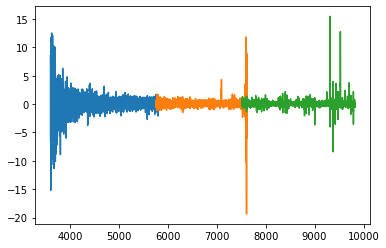

In [107]:
#w=numpy.where(s0d.fibermap['TARGETID']==39632930984689832)[0]
#s0d=s0d[w]
#     spectra = coadd_cameras(s1)
for b in s0d.bands:
#         ok = numpy.logical_and(s1.mask[b][w[0]] == 0,s1.ivar[b][w[0]] != 0)
#         plt.plot(s1.wave[b][ok],s1.flux[b][w[0],ok]) 
    ok = numpy.logical_and(s0d.mask[b][0,:] == 0,s0d.ivar[b][0,:] != 0)
    plt.plot(s0d.wave[b][ok],s0d.flux[b][0,ok])

In [38]:
f1 = f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/{du[0]['TILEID']}/{yyyymmdd}/spectra-{du[0]['PETAL_LOC']}-{du[0]['TILEID']}-thru{yyyymmdd}.fits"
s1 = Spectra()
s1 = read_spectra(f1)
s1.fibermap

INFO:spectra.py:253:read_spectra: iotime 1.918 sec to read spectra-3-1-thru20210406.fits at 2021-07-20T14:15:35.669182


TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,DELTA_X,DELTA_Y,FIBER_RA,FIBER_DEC,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,TILEID
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32
39627847635042774,3,69,3069,1500,0,149.52048102850392,2.5898907791217454,0.0,0.0,2015.5,5400.0,2162697,1,TGT,126.765144,74.43516,103200,0.7553672274490444,1,9010,345366,470,DEV,0.122039385,0.99172044,6.3039675,283.90717,197.73463,18.135334,0,0,,0.0,0.0,0.0,0.0,1496p025,0.019523134,28.390789,21.234022,2.1930811,0.5464032,0.048500795,0.39412874,2.5053177,0.048500795,0.39412874,2.5053177,4.0,0.7658064,-0.04436288,-0.010842697,S,103200,9,2162697,0,0,0,0,0,0,2,126.759,74.436,0.002,-0.004,149.52048919906807,2.589907136068475,860.625,0.7728334426396877,20210406,83714,59311.13373059,1
39627847630852661,3,78,3078,1501,0,149.45591042374338,2.563333126849073,0.0,0.0,2015.5,5400.0,1152921504609009673,1,TGT,142.67244,68.03043,103200,0.5991145179675139,517,9010,345365,4661,DEV,3.8875945,21.187418,51.025627,214.51334,98.61064,14.602158,0,0,,0.0,0.0,0.0,0.0,1493p025,0.020471008,97.192795,57.13752,1.3178041,0.39139566,1.0532484,5.7402115,13.824143,1.05437,5.745292,13.828243,4.0,1.4197546,-0.018556084,0.028687079,S,103200,9,1152921504609009673,131074,0,0,0,0,0,2,142.674,68.029,-0.006,-0.003,149.45588615965764,2.563345208417504,860.625,0.7594394859580775,20210406,83714,59311.13373059,1
39627841599440351,3,10,3010,1502,0,149.80800313695215,2.3664846530277495,0.0,0.0,2015.5,5400.0,1441862,1,TGT,56.3504,19.63901,103400,0.043488441146655066,1,9010,343927,1503,PSF,1.4196032,1.491319,1.7954937,1544.5505,474.0113,151.85263,0,0,,0.0,0.0,0.0,0.0,1498p022,0.020040825,1.5391436,2.976353,3.248919,0.70568,1.1053874,1.1612296,1.3980782,1.1053874,1.1612296,1.3980782,0.0,0.0,0.0,0.0,S,103400,9,1441862,0,0,0,0,0,0,2,56.349,19.646,-0.004,-0.001,149.80798669823406,2.3664887372646244,860.625,0.7889999999999998,20210406,83714,59311.13373059,1
-8131,3,111,3111,1503,521,149.41467709209252,2.6756117178748906,0.0,0.0,0.0,5400.0,0,0,,153.02281,95.711365,0,0.0,0,0,0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0,0,,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0,0,0,0,0,0,0,0,0,2,150.358,95.478,2.66,0.225,149.42541432949588,2.674788231511242,860.625,0.0,20210406,83714,59311.13373059,1
39627847635043036,3,60,3060,1504,0,149.5337761895054,2.5386129618576336,0.0,0.0,2015.5,5400.0,1179714,1,TGT,123.451195,61.85435,103100,0.6435725707735409,1,9010,345366,732,REX,0.50320685,0.4729942,0.6114274,568.2483,320.59198,79.5921,0,0,,0.0,0.0,0.0,0.0,1496p025,0.020395698,0.7943928,2.6396098,2.9466963,0.6540987,0.33173785,0.3118202,0.40308192,0.331738,0.31182057,0.40308285,1.0,0.28773737,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,2,123.452,61.857,-0.005,-0.005,149.53375589532422,2.5386332809819923,860.625,0.7849766913664163,20210406,83714,59311.13373059

In [27]:
groups01 = dats_group.groups[0:2]
groups01 = groups01.group_by(['TARGET_RA','TARGET_DEC'])

#for g in groups01.groups:
for g in dats_group.groups:
    #print(type(g)) <class 'astropy.table.table.Table'>
    start_time = time.time()
    d = g.group_by(['NIGHT'])
    du = unique(d, keys=['NIGHT']) 
    print("du[0]" + str(du[0]))
    s0 = spectra_no_expid() ### all spectra
    s0c = spectra_no_expid() ### only current spectra
    s0r = spectra_no_expid() ### only reference spectra
    s0d = spectra_no_expid() ### differenced spectra

    f0 = f"/global/project/projectdirs/desi/spectro/redux/daily/tiles/cumulative/{du[0]['TILEID']}/{yyyymmdd}/spectra-{du[0]['PETAL_LOC']}-{du[0]['TILEID']}-thru{yyyymmdd}.fits"
    #this is being done multiple times: need to find way to implement select(targets = ['TID']) for files already read in
    s0 = read_spectra_no_expid(f0)
    s0c = s0.select_no_expid(nights = [yyyymmdd])
    print('after read_spectra ' + str(type(s0)))
    print('after select ' + str(type(s0c)))
    coadd_no_expid(s0c)
    for t in du:
        
        if (t['NIGHT'] == (yyyymmdd-1)):
            s0c.update_no_expid(s0.select_no_expid(nights = [yyyymmdd-1]))
            print("updated %s" % s0.select_no_expid(nights = [yyyymmdd-1]))
            coadd_no_expid(s0c)
        elif t['NIGHT'] < yyyymmdd-1: # in future, use getPrevObsdate for days > 30 days ago
            if (s0r.num_spectra() == 0): 
            # first (or only) ref night found
                s0r = s0.select_no_expid([t['NIGHT']])
                print(t['NIGHT'])
            else:
                s0r = s0.update_no_expid(s0.select_no_expid(nights = [t['NIGHT']]))
                print(t['NIGHT'])
            coadd_no_expid(s0r)
            for i in s0r.flux:
            #flip signs of r0a.flux
                s0r.flux[i] = -1*r0a.flux[i]
    
    if s0r.num_spectra() != 0:
    # if there is something to difference
        s0d.update_no_expid(s0c) #not working 
        s0d.update_no_expid(s0r) #not working
        print("s0d differenced")
        coadd_no_expid(s0d)   #how to store differenced spectra as one per reference spectra will be produced
    else:
        print("no reference nights")
    print("--- group_by NIGHT  %s seconds ---" % (time.time() - start_time))
                


du[0]     TARGETID         TARGET_RA         TARGET_DEC    TILEID OBJTYPE PETAL_LOC  NIGHT        MJD      
----------------- ------------------ ---------------- ------ ------- --------- -------- --------------
39627841574276999 148.43269333549472 2.29989340162531      1     TGT         3 20210406 59311.13373059


NameError: name 'read_spectra_no_expid' is not defined